# **Логирование экспериментов**

Итак, запуск экспериментов по машинному обучению включает в себя множество задач, таких как EDA и предобработка данных. В последнюю может входить заполнение пропусков данных, проверка различных алгоритмов с целью поиска наилучшего, анализ производительности модели и другие связанные задачи, которые зависят от решаемой проблемы.

Как вы уже знаете, в процессе проведения эксперимента по машинному обучению можно использовать функцию print() для просмотра выходных данных экспериментов, таких как уровень корреляции данных в выборке, результат тестирования статистической гипотезы и так далее. 

Однако время от времени выводить результат на экран с помощью функции print() бесполезно, так как при запуске следующего эксперимента вы потеряете все результаты предыдущего эксперимента, если не запишете их вручную в документ. 

Таким образом, сравнение результатов ML-экспериментов становится весьма затруднительным процессом, потому что необходимо иметь записи всех проводимых ранее экспериментов. Например, если во время EDA-задачи предсказания спроса на лекарство изменяются данные, то каждый раз выводить на экран новую визуализацию неудобно. 

Логирование решает эту проблему! Даже если информация изменится с запуском нового эксперимента, всё будет зафиксировано в логе. 

> Лог (*log*) — это специальный журнал, в котором хранится информация о состоянии работы программы. Логирование (ведение журнала) обеспечивает отслеживание событий, происходящих во время работы программы, и может выводить эти события в отдельный файл, чтобы вы могли отслеживать, что происходит во время выполнения кода. 

Пример такого файла: 

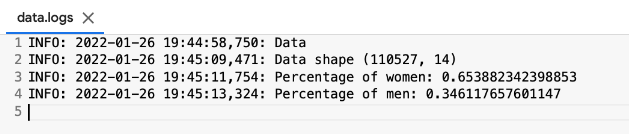

Здесь зафиксирована информация о форме данных и соотношение классов целевой переменной Gender. Это даёт возможность отлаживать код. Далее мы подробнее разберём, как создавать логи. 

Для логирования в Python используется модуль logging. Он используется большинством сторонних библиотек Python, поэтому вы можете интегрировать свои логи с сообщениями из этих библиотек для создания единого журнала логов приложения. Данный модуль импортируется как другие библиотеки:

In [1]:
import logging

Прежде чем приступить к логированию, необходимо установить базовые настройки:

* уровень;
* обработчик (хендлер);
* формат логирования. 

### НАСТРОЙКА УРОВНЯ ЛОГИРОВАНИЯ

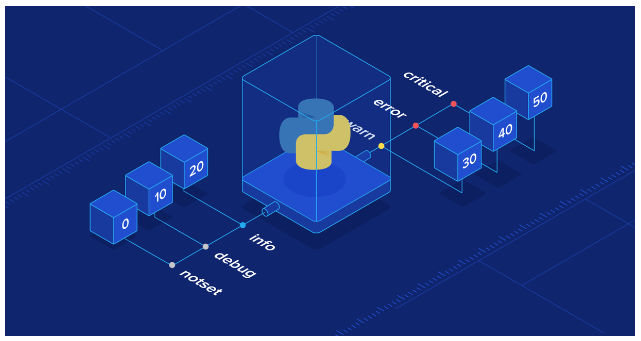

С импортированным модулем *logging* вы можете использовать так называемый *«logger»* для логирования сообщений, которые вы хотите видеть (вместо вывода их на экран командой print()). 

По умолчанию существует пять стандартных уровней логирования, указывающих на важность событий: 

* отладка;
* информация;
* предупреждение;
* ошибка;
* критический. 

Самый низкий уровень из данных — не установлен, а самый высокий уровень является критическим. Установив уровень логирования, можно записать сообщение специально для этого уровня в определённый файл журнала. Возле сообщения будет указан его уровень.

In [2]:
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


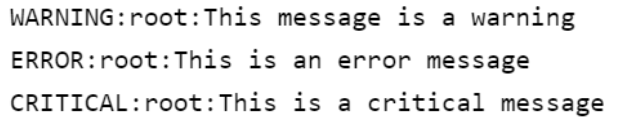

Здесь мы дали команду залогировать пять сообщений. Вывод команд показывает уровень важности перед каждым сообщением *(WARNING/ERROR/CRITICAL)*. root — имя логгера по умолчанию.

Этот формат, который показывает уровень, имя и сообщение, разделенные двоеточием (:), является форматом вывода по умолчанию. Его можно изменить для включения таких вещей, как отметка времени, номер строки и других деталей. Мы научимся делать это чуть ниже.

Обратите внимание, что сообщения *debug()* и *info()* не были отображены. Это связано с тем, что по умолчанию модуль ведения журнала регистрирует сообщения только с уровнем *ПРЕДУПРЕЖДЕНИЕ (WARNING)* или выше. Вы можете изменить это, сконфигурировав модуль *logging* для регистрации событий всех уровней, то есть установив уровень на *ОТЛАДКУ (DEBUG)*. 

Другой вариант сбросить настройки logging — воспользоваться функцией reload() из вспомогательной системной библиотеки importlib:

In [3]:
from importlib import reload
import logging
reload(logging)

<module 'logging' from '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/logging/__init__.py'>

Далее, когда настройки логирования сброшены, нам необходимо перед выводом сообщений, сразу после импорта, изменить конфигурацию логгера.

In [4]:
logging.basicConfig(level=logging.DEBUG)

Мы настроили уровень ведения журнала DEBUG. Это означает, что теперь будут отслеживаться только сообщения этого уровня (DEBUG) и выше. В результате выполнения кода логирования мы должны получить следующие сообщения:

In [5]:
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG:root:This is a debug message
INFO:root:This is an informational message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


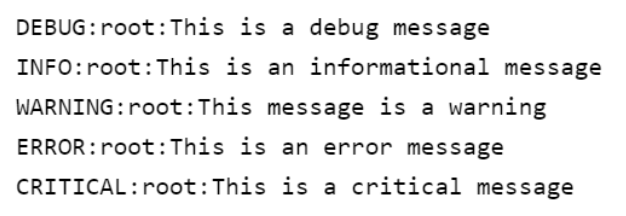

Как видно из результата выполнения кода, теперь в консоль выводятся лог-сообщения всех уровней.

Однако, как вы понимаете, логирование в консоль ничем не лучше простого вывода сообщений с помощью функции print(). Обычно логирование производится в специальные лог-файлы, для этого используются обработчики (хендлеры) логов. Давайте рассмотрим пример логирования в файл.

### УСТАНОВКА ОБРАБОТЧИКА ЛОГИРОВАНИЯ

> Функция **обработчиков ведения журналов** состоит в том, чтобы отображать записи/сообщения журнала на любом выходе, который вы выберете. То есть вы можете выбрать, отображать ли ваш лог в виде файла, HTTP-страницы или даже отправить лог на электронную почту через SMTP. 

Более того, у созданного вами logger может быть несколько обработчиков, а это значит, что вы можете настроить его на сохранение в файл журнала, а также на отправку по email одновременно.

Обработчики являются классами модуля logging. Нам понадобится обработчик FileHandler, который возьмёт запись/сообщение журнала и добавит его в файл журнала log_file.log:

In [6]:
logging.FileHandler('log_file.log')

<FileHandler /Users/sayonara/Desktop/Учеба/SF-DS-practice/block-3/Educational_Materials/EDA-5./log_file.log (NOTSET)>

### УСТАНОВКА ФОРМАТА ЛОГИРОВАНИЯ

Как мы уже сказали, типичный формат лога выглядит так: уровень: имя: сообщение. Однако его можно изменить.

Существуют различные способы форматирования записи журнала. Вы можете включить дату, время и уровень ведения журнала в свой формат, чтобы знать, когда журнал был отправлен и на каком уровне. В приведённом ниже примере показано, как можно настроить формат записей журнала. Так как мы вновь переопределяем настройки библиотеки logging, то не забудем сбросить конфигурацию.

In [7]:
from importlib import reload
import logging
reload(logging)
 
logging.basicConfig(
    format="%(levelname)s: %(asctime)s: %(message)s",
    level=logging.DEBUG
)
logging.info('Check')

INFO: 2024-02-03 22:50:25,964: Check


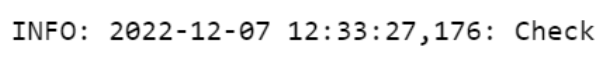



Здесь формат записей журнала включает дату, время, уровень ведения журнала и само сообщение.

Таким образом, вы можете изменять как формат лога, так и формат вывода. Добавление времени сообщения существенно облегчает работу — становится легко отследить, когда было получено сообщение.

✍️ Теперь, когда вы понимаете основы модуля logging в Python, посмотрим, как можно его использовать при проведении экспериментов по машинному обучению. Давайте залогируем информацию о нашем датасете Medical Appointment No Shows. 

Создадим новый ipynb файл, в котором будем выполнять логирование.

Создадим функцию get_logger() для генерации лог-файла и записи в него информации.

In [8]:
import os.path

# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

Итак, get_logger принимает на вход папку, в которой вы хотите хранить файл лога и имя файла. Функция нацелена на создание информационных сообщений и записи их в лог-файл. Для того, чтобы освежить в памяти знания по работе с файлами, вы можете вернуться к Блоку 2 нашего курса («Подгрузка данных»).  

Для удобства лог-файлы хранят в отдельной директории. Новую папку можно создать с помощью команды mkdir:

In [9]:
!mkdir logs

Создадим лог-файл и запишем туда информацию о датасете.

In [10]:
import pandas as pd
df = pd.read_csv('data/KaggleV2-May-2016.csv')

In [11]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO: 2024-02-03 22:50:26,765: Data
INFO: 2024-02-03 22:50:26,766: Data shape (110527, 14)
/var/folders/2k/wgrqjc315ll2cb03hx2xkf_80000gn/T/ipykernel_11468/2576330178.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))
INFO: 2024-02-03 22:50:26,778: Percentage of women: 0.653882342398853
/var/folders/2k/wgrqjc315ll2cb03hx2xkf_80000gn/T/ipykernel_11468/2576330178.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))


В директории logs появится файл data.logs, который будет выглядеть следующим образом:

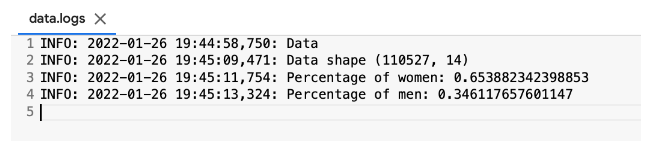

⭐️ Отлично! Мы зафиксировали информацию о датасете в лог-файл. Такой файл отражает сведения о том, что всё работает в штатном режиме (то есть просто ежедневный мониторинг программы) или что произошла какая-то ошибка, на которую нужно максимально срочно отреагировать и устранить. Например, мы можем проверять форму данных, и, если форма не соответствует необходимой, логировать ошибку:

In [12]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR: 2024-02-03 22:50:26,795: Data shape is incorrect!


Посмотрим на обновленный файл data.logs:

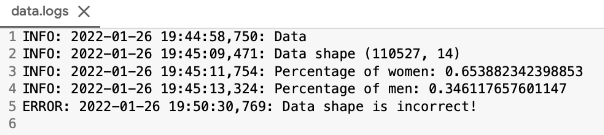

⭐️ В следующем юните вы познакомитесь с платформой, которая позволяет не только логировать информацию об эксперименте, но и с лёгкостью сравнивать эксперименты между собой, а также работать над ними в команде!